In [0]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [0]:
url = 'https://raw.githubusercontent.com/suraj2508/Final-year/master/movie_dataset.csv'
movie = pd.read_csv(url)

In [3]:
movie.head(1)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron


In [0]:
lst = [x.lower() for x in movie.title] 
#print(lst)

In [0]:
movie.insert(2,"real_titles",lst) 

In [6]:
movie.head(1)

,index,budget,real_titles,genres,homepage,id,keywords,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,avatar,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron


In [7]:
movie.columns

Index(['index', 'budget', 'real_titles', 'genres', 'homepage', 'id',
       'keywords', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'vote_average', 'vote_count', 'cast', 'crew',
       'director'],
      dtype='object')

In [0]:
#movie.dtypes

In [9]:
C= movie['vote_average'].mean() #mean rating for all movies
C

6.092171559442011

In [10]:
m= movie['vote_count'].quantile(0.9)   #minimum votes to qualify to the list and the percentile is set to 90 means it must have more votes than atleast 90% movies.
m

1838.4000000000015

In [11]:
filter = movie.copy().loc[movie['vote_count'] >= m]   #filter movies that qualify the list
filter.shape

(481, 25)

In [0]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)
#v is the number of votes for the movie,m is the minimum votes required to be listed in the chart,R is the average rating of the movie And
#,C is the mean vote across the whole report

In [0]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
filter['scores'] = filter.apply(weighted_rating, axis="columns")

In [14]:
filter['scores'].head()

0    7.050669
1    6.665696
2    6.239396
3    7.346721
4    6.096368
Name: scores, dtype: float64

Text(0.5, 1.0, 'Popular Movies')

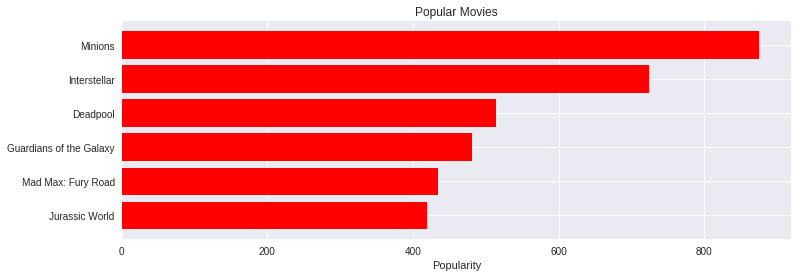

In [15]:
pop= movie.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='red')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [16]:
#Sort movies based on score calculated above
filter = filter.sort_values('scores', ascending=False)

#Print the movies
filter[['original_title', 'vote_count', 'vote_average', 'scores']].head(10)

,original_title,vote_count,vote_average,scores
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


In [0]:
features = ['keywords','cast','genres','director']

In [0]:
def combine_features(row):
    return row['keywords']+" "+row['cast']+" "+row['genres']+" "+row['director']

In [0]:
for feature in features:
    movie[feature] = movie[feature].fillna('') #filling all NaNs with blank string

movie["combined_features"] = movie.apply(combine_features,axis=1)

In [0]:
cv = CountVectorizer() #count the no of text
count = cv.fit_transform(movie["combined_features"]) # combined strings(movie contents) to CountVectorizer() object

In [0]:
cosine_sim = cosine_similarity(count)

In [22]:
movie_user_likes = input("Enter movie name-").lower()
print('You Selected-'+movie_user_likes)

Enter movie name-avatar
You Selected-avatar


In [0]:
def get_title_from_index(index):
    return movie[movie.index == index]["title"].values[0]
def get_index_from_title(title):
    return movie[movie.real_titles == title]["index"].values[0]

In [24]:
try:
  movie_index = get_index_from_title(movie_user_likes)
  similar_movies =  list(enumerate(cosine_sim[movie_index]))
  sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:6]
  i=0
  print("Top 5 similar movies to "+movie_user_likes+" are:\n")
  for element in sorted_similar_movies:
    print(get_title_from_index(element[0]))
    i=i+1
    if i>5:
      break
except:
  print("Sorry We Dont have this movie In out dataset")

Top 5 similar movies to avatar are:

Guardians of the Galaxy
Aliens
Star Wars: Clone Wars: Volume 1
Star Trek Into Darkness
Star Trek Beyond
